In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [75]:
df = pd.read_csv("../Support_Vector_Regression/Position_Salaries.csv")
df.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [76]:
X_orig = df.iloc[:, 1:-1].values
y_orig = df.iloc[:, 2].values

In [77]:
#SVR Requires FeatureScaling
SC_X = StandardScaler()
X = SC_X.fit_transform(X_orig)
SC_y = StandardScaler()
y = SC_y.fit_transform(y_orig.reshape(-1,1))

D:\anaconda36\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
svr = SVR(kernel='rbf').fit(X,y)

D:\anaconda36\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


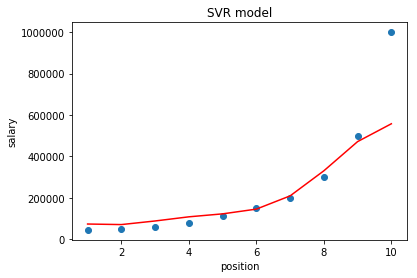

In [79]:
#convert back the y to original values (before scaled)
y_pred = SC_y.inverse_transform(svr.predict(X))

#plot the linear model
plt.scatter(X_orig,y_orig)
plt.plot(X_orig, y_pred, color='red')
plt.title("SVR model")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()